# Data Science Project - Logistic Regression Demonstration
___

# 1. Project Purpose - Demo and explain (simple) logistic regression

This notebook was created for two reasons:
1. Primarily, to outline an example of how to compute a (simple) logistic regression model and apply it to some (artificial) data and,
- Secondarily, to introduce the underlying theory of the model as supplemental information.

The logistic regression model equation, in its most **simple** form (i.e. two dimensional, one independent variable and one dependent variable), uses the sigmoid function equation:

$$\hat Y= \dfrac{1}{1+e^{-(mx + b)}} \quad\text{or}\quad \hat Y = \dfrac{1}{1+e^{-(\beta_1 X_1 + \beta_0)}} $$

When a logistic regression model has more than one independent variable, it is a *multiple* logistic regression model. The logistic regression model in a more generalized form has $n$ dimensions and has the equation:

$$\hat Y= \dfrac{1}{1+e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n)}} \text{,} \quad\text{i.e.} \quad \hat Y = \dfrac{1}{1+e^{-(\beta^T X)}} \quad\text{or} \quad h(X) = \dfrac{1}{1+e^{-(\sum_{i=1}^n\beta_i X_i)}}$$


To **fit a logistic regression model** to some data is to estimate the **optimal model parameters** ($\hat\beta_{0-n}$) based on some sort of evaluation criteria involving said data.

An objective evaluation criteria is a cost function, $J(\beta_{0-n})$, and the optimal model parameters are the parameters which minimize the cost function.

>*(The cost function uses a $J$ because it is based off the **Jacobian** matrix, invented by **Jacobi**.)*

## 2. Data Source - Generate 2D data with binary dependent variable
For this demonstration, the data needed to perform a simple logistic regression will be generated directly. **Simple** logistic regression means only one **independent variable**, therefore we need a set of $(x,y)$ pairs to represent our 2D data. The $x$ value, our indepedent variable, will have continuous value. This demo will use a binomial dependent variable, i.e. $y$ will have the binary ouputs of either $0$ or $1$.

Noise is necessarily included to match the probabilistic aspect of the dependent variable output of the model. The logistic model represents a cumulative probability distribution, i.e. for any given x value the model ouput is a probability that the y value is 1. So to generate data from our simulated true model, we need to draw samples based on this probability model. Essentially, we need corresponding y values to a set of X values which match the probability distribution that is our model.

There are two ways to do this. The first and most simple way is simply to generate a random set of y values between 0 and 1 following a uniform distibution, and assign each of these values to an x value. The corresponding binary output is simply whether our random y value is greater than or less than the y value our model predicts.

An alternative, more complex but interesting, method to generate data is to inject noise directly into our model. This can easily be done with a linear regression model, but requires some careful design for a logistic regression model. Since, just like with the simple method to sample our distribution, we expect our errors to be logistically distributed, we need to add logit error to our model. And just like with the simple method, we need the error to stem from a uniform distribution, so we apply the logit function to our uniform noise, add that to our model and then compute the resulting prediction values.

In [34]:
#Numpy will be used to generate the data
import numpy as np

#Define our true model parameters
sigmoid_midpoint = 2
sigmoid_scale = 10

#Compute the model parameter vector beta
bias = -sigmoid_scale * sigmoid_midpoint
beta_1 = sigmoid_scale
beta = [bias,beta_1]

#Define a sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#Determine our data generation parameters
np.random.seed(0)
num_data_points = 5000

#Define a factor which scale the range of data surrounding our model midpoint
x_range_scale = 1.5

#Generate the independent variables
#x = np.random.rand(num_data_points)*x_range_scale+sigmoid_midpoint
x = (np.arange(0,1,1/num_data_points)-0.5)*x_range_scale+sigmoid_midpoint

#Compute the dependent variable probabilities
p_y = sigmoid(x*beta_1+bias)

#Convert the noiseless probabilities into binary outcomes
y_noiseless = np.round(p_y)

#Generate random noise with a uniform distribution between 0 and 1
noise = np.random.rand(num_data_points)
normal = np.random.normal(0,2,num_data_points)

#Samples from the dependent variable probability distrubtion using added logit noise
#p_y_noisy = (sigmoid(beta_1*x+bias)+noise)/2 #Alternative copmutation for adding noise to the "probability"
#p_y_noisy = sigmoid((sigmoid(beta_1*x+bias)-noise)/(noise*(1-noise))) #Equivalent computation to adding logit noise
p_y_noisy = sigmoid(beta_1*x+bias+np.log(noise/(1-noise))) # + normal) #-> normal doesn't work!

#Convert the noisy samples into binary outcomes
#y = np.array(p_y > (1-noise)).astype(int) #Equivalent computation without needing noisy "probabilities"
y = np.round(p_y_noisy)

print("True Model sigmoid midpoint : " + str(sigmoid_midpoint))
print("True Model sigmoid scale    : " + str(sigmoid_scale))
print("True Model Beta 0 (bias)   : " + str(beta[0]))
print("True Model Beta 1          : " + str(beta[1]))

True Model sigmoid midpoint : 2
True Model sigmoid scale    : 10
True Model Beta 0 (bias)   : -20
True Model Beta 1          : 10


### A note about noise

Notice how we add logit-uniform noise to our sigmoid transformation of our linear model, instead of normal noise. The two noises have slightly different probability distributions. Since we're assuming uniform sampling in our sigmoid model space, we use uniform noise and then convert it to logit instead of the normal noise. See the histogram and the max/min values of the two different distribution as examples of how they differ.

Max value normal noise : 7.663580324802107
Min value normal noise : -8.893264482718589
Max value logit noise : 10.178342869156674
Min value logit noise : -8.700701166125988


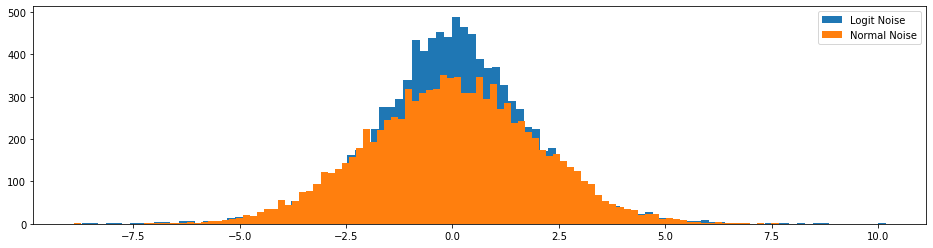

In [35]:
uniformnoise = np.random.rand(10000)
normalnoise = np.random.normal(0,2,10000)

logitnoise = np.log(uniformnoise/(1-uniformnoise))

plt.hist(logitnoise,100, label = "Logit Noise");
plt.hist(normalnoise,100, label = "Normal Noise");
plt.legend(loc='best')

print("Max value normal noise : " + str(max(normalnoise)))
print("Min value normal noise : " + str(min(normalnoise)))
print("Max value logit noise : " + str(max(logitnoise)))
print("Min value logit noise : " + str(min(logitnoise)))


## 3. Data Structure and Quality - Visualize the data using scatterplots
Since we generated our data, we don't need to clean it, just visualize it. For a real-world data science project, cleaning data is very important.

> Notice how the binary prediction in the noisy data overlaps for certain indepedent ($x$) values, but there is no overlap in the noiseless data. <br> The most appropriate sigmoid shape for the noiseless data would be a step function at $x = 0$ (sigmoid_midpoint).

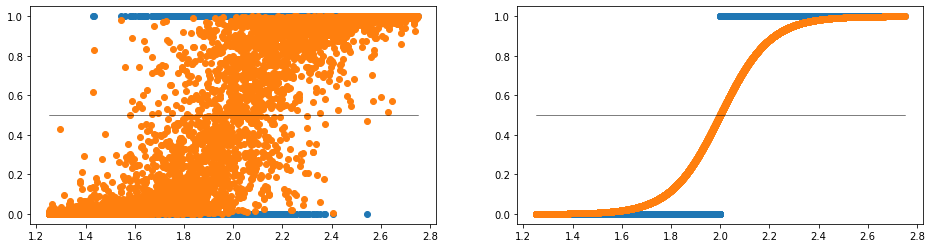

In [36]:
#Matplotlib will be used to visualize the data
import matplotlib.pyplot as plt

#Fit plots to the width of browser
plt.rcParams["figure.figsize"] =(16,4) 

#Create two plots
fig, (ax1, ax2) = plt.subplots(1, 2)

#Create plot for noisy data with midline binary class seperator
ax1.plot([min(x),max(x)],[0.5,0.5],linewidth=0.5,color='k')
ax1.scatter(x,y);
ax1.scatter(x,p_y_noisy);

#Create plot for noiseless data with midline binary class seperator
ax2.plot([min(x),max(x)],[0.5,0.5],linewidth=0.5,color='k')
ax2.scatter(x,y_noiseless);
ax2.scatter(x,p_y);

## 4. Data Model - Compute the logistic regression coefficients using gradient descent
A logistic regression model does not have a closed form analytical solution to the optimal coefficients, and thus needs to be fit using *Gradient Descent*.

> Gradient Descent	-	A computational optimization method which iteratively updates a model's parameters proportionally to the slope of an error function in order to find the function's minimum value.

The gradient descent method, in its most general form (i.e. using a generic vector of parameters and a symbolic representation of the cost function),has the following equation:

$$\beta_{n+1}\;=\;\beta_n\; -\; \alpha \; \nabla \; J(\beta_n) \tag{1}$$
<br>

Symbol  |  | Name | | Additional Names
-: | :-: | :- | :- | :-
$\beta$ | is the | **model parameter vector** | or | *regression coefficient vector*, *weight vector*
$\beta_{n+1}$ | is the | **updated vector** | or | *predicted vector*
$\beta_n$ | is the | **current vector** |  | 
$-$ | means | go **down** the slope (or gradient)| | *it's just a minus symbol*
$\alpha$ | is the | **learning rate** |  | 
$\nabla$ | is the | **gradient operator** | or | *vector differential operator*, i.e. *nabla* or *del*
$J()$ | is the | **cost function** | or  | *loss function*, *objective function*$^*$ 
$J(\beta_n)$ | is the | **cost function evaluated using the current parameters** |  | 


> $^*$ The terms $\texttt{cost function}$, $\texttt{loss function}$ and $\texttt{objective function}$ are mostly used synonomously, so their slight differences won't be addressed here.

While linear regression has for its cost function the sum of the squared vertical deviations from the model to the true values, logistic regression does not. The hypothesis equation of logistic regression is the sigmoid function, which is non-linear, and so squared error is a non-convex function. This means it could have local minimums that aren't the global minimum we're trying to reach.

As such, logistic regression uses log-loss for its loss/cost function, also called cross entropy. The log loss can be represented as individual equations depending on the value of the observation output variable:

$$
\begin{align}
J(\beta | y = 1) &&=&& -log(&&h(X)&&)
\\
J(\beta | y = 0) &&=&& -log(&&1-h(X)&&)
\end{align}
$$

These equations can be combined into a single loss equation, by cleverly multiplying the seperate losses by the true outcome value to negate them depending on the value of the true outcome:

$$ J(\beta) = \dfrac{1}{m}\sum_{i=1}^m (y_i)[-log(h(X))] + (1-y_i)[-log(1-h(X))]$$

Finally, this equation can be simplified and vectorized, yielding:

$$ J(\beta) = \dfrac{1}{m} [-y^Tlog(h)-(1-y)^Tlog(1-h)]$$

and recall:
$$h(X_i) = \hat Y = \dfrac{1}{1+e^{-(\beta^T X)}}$$

To use our loss function in gradient descent (equation $(1)$ ), we need to calculate its gradient, $\nabla$ (aka slope or derivative). Conveniently, the gradient of a sigmoid function can actually be written in term of the function itself:
$$\nabla s(z) = s'(z) = s(z)[1-s(z)]dz \qquad \text{where} \qquad s(z) = \dfrac{1}{1+e^{-z}}$$

Proof:

$ \dfrac{d s(z)}{dz} = \dfrac{d}{dz} \dfrac{1}{1+e^{-z}} =\dfrac{d}{dz} (1+e^{-z})^-1 = - (\dfrac{-e^{-z}}{(1+e^{-z})^2}) \qquad\text{and}\qquad 1 - \dfrac{1}{1+e^{-z}}= \dfrac{e^{-z}}{1+e^{-z}} \qquad \therefore \qquad \dfrac{d s(z)}{dz} = s(z)[1-s(z)] $

So, starting with our loss function:

$$ J(\beta) = \dfrac{1}{m} [-y^Tlog(h)-(1-y)^Tlog(1-h)]$$

We find its gradient:

$$\nabla J(\beta) = J'(\beta) = \dfrac{\partial J(\beta)}{\partial\beta_k}= \dfrac{1}{m} [-y^Tlog(h)'-(1-y)^Tlog(1-h)']$$

Recall: $ log(x)' = \dfrac{1}{x}dx$

$$\nabla J(\beta) = J'(\beta) = \dfrac{\partial J(\beta)}{ \partial\beta_k}
= \dfrac{1}{m} [-y^T\dfrac{1}{h}h'-(1-y)^T\dfrac{1}{1-h}(-h')]
\qquad \text{and} \qquad
h'(X) = h(X)[1-h(X)]\dfrac{\partial X}{\partial \beta}
$$

$$
\nabla J(\beta) = \dfrac{1}{m} [-y^T[1-h(X)]\dfrac{\partial X}{\partial \beta_k}-(1-y)^T h(X) \dfrac{\partial X}{\partial \beta_k}]
\qquad \text{and} \qquad
\dfrac{\partial X}{\partial \beta_k} = X_k
$$

$$
\nabla J(\beta) = \dfrac{1}{m} [-y^T[1-h(X)]X_k+(1-y)^T h(X) X_k]
$$

$$
\nabla J(\beta) = \dfrac{1}{m} [-y^TX_k+ h(X) X_k]
$$

$$
\nabla J(\beta) = \dfrac{1}{m} [h(X)-y^T]X_k \qquad \text{and} \qquad h(X) = \hat y
$$

This equation can be vectorized, yielding the parameter update equation:
$$
\beta_{n+1} = \beta_{n} - \dfrac{\alpha}{m}[\hat y-y^T]X
$$

The final component of performing gradient descent is the number of iterations (repetitions) of performing the parameter update. The number of iterations is called epochs. Both epochs and learning rate are called **hyper-parameters**, as they are *parameters* that are involved in applying the model (as opposed to the parameters of the model itself). Appropriate choices of each are model and data dependent, and often require tuning. More sophisticated methods can be applied to modify the learning rate during the iterative process or determine the number of iterations or when to stop the process, but they are not applied here.

In [37]:
#Create the indepedent variable array with intercept(bias) value column filled with ones
m = len(y)
X = np.vstack((np.ones(m),x))

#Initialize the model paramters for training
beta = np.zeros(X.shape[0])

#Define the gradient descent training function
def gradient_descent(X, y, Beta, learning_rate, epochs):
    
    #Normalize the learning rate to the number of inputs
    m = len(y)
    lr_normalized = learning_rate / m
    
    #Loop through the number epochs updating the model parameters
    for epoch in range(epochs):
        i = range(m)
        #for i in range(m):
        y_hat = sigmoid(X.T[i] @ Beta)
        #Beta -= (lr_normalized) * (((((y_hat - y[i]))**1)*y_hat*(1-y_hat))@X.T[i])
        #y_hat = sigmoid(X.T @ Beta)
        Beta -= (lr_normalized) * ((y_hat - y)@X.T) #*y_hat*(1-y_hat)

    return Beta

#Define the gradient descent training hyper-parameters
epochs = 2000
learning_rate = 1

#Execute gradient descent and report the results
beta = gradient_descent(X,y,beta,learning_rate,epochs)

print("Model sigmoid midpoint : " + str(-beta[0]/beta[1]))
print("Model sigmoid scale    : " + str(beta[1]))
print("Model Beta 0 (bias)   : " + str(beta[0]))
print("Model Beta 1          : " + str(beta[1]))

Model sigmoid midpoint : 1.9937904710594392
Model sigmoid scale    : 8.40774860720049
Model Beta 0 (bias)   : -16.76328905609961
Model Beta 1          : 8.40774860720049


## 5. Results and Insights - Compare the model to the data
Visualize the resulting regression model.

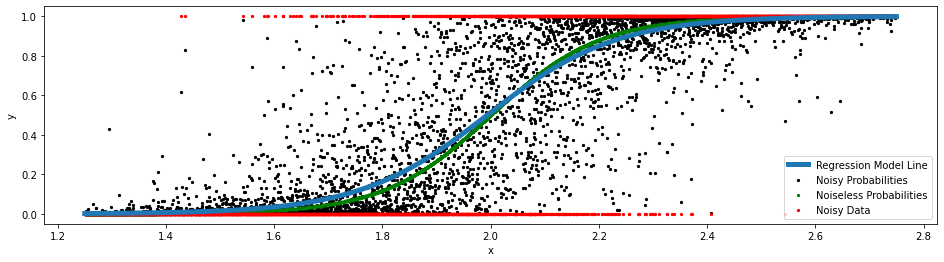

In [38]:
#Compute (and sort, if using random x inputs) the regression model
y_hat = sigmoid(X.T @ beta)
(xx,y_hat) = np.sort(np.c_[x,y_hat],axis=0).T

# Plot the regression line 
plt.plot(xx, y_hat, linewidth=5, label = "Regression Model Line") 

# Plot the data again
plt.scatter(x, p_y_noisy,s=5,c='k', label = "Noisy Probabilities")
plt.scatter(x, p_y,s=5,c='g', label = "Noiseless Probabilities")
plt.scatter(x,y,s=5,c='r', label = "Noisy Data")

# Add labels 
plt.legend(loc='best')
plt.xlabel('x') 
plt.ylabel('y')

# function to show plot 
plt.show() 

## References
Logistic Regression
- https://towardsdatascience.com/from-linear-to-logistic-regression-explained-step-by-step-11d7f0a9c29

Loss Function
- https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

Loss Function Derivation
- http://thegrandjanitor.com/2015/08/20/gradient-descent-for-logistic-regression/